In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("student_data.csv")

print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

Shape: (395, 33)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null  

In [6]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
st

In [7]:
# 3️⃣ Missing Value %
missing_percent = df.isnull().sum() / len(df) * 100
print("\nMissing Value Percentage:")
print(missing_percent)


Missing Value Percentage:
school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
dtype: float64


In [8]:
numeric_cols = df.select_dtypes(include=np.number).columns

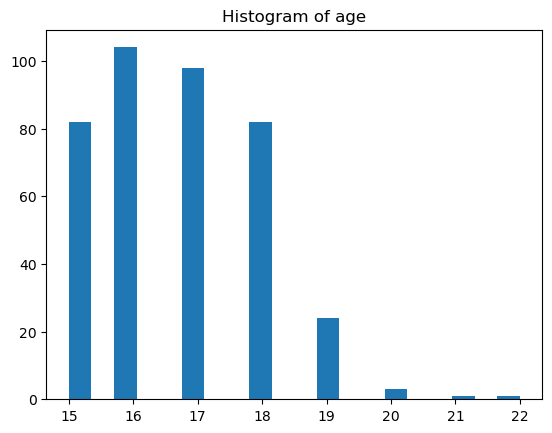

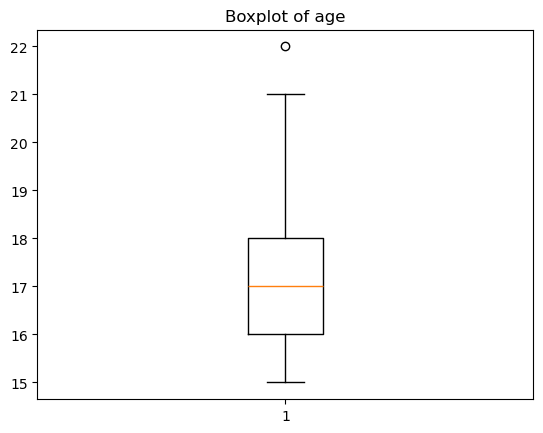

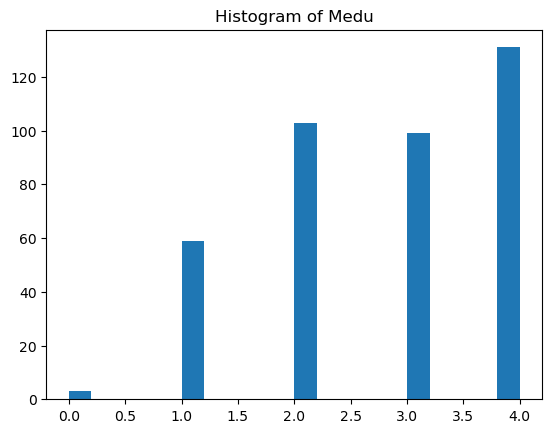

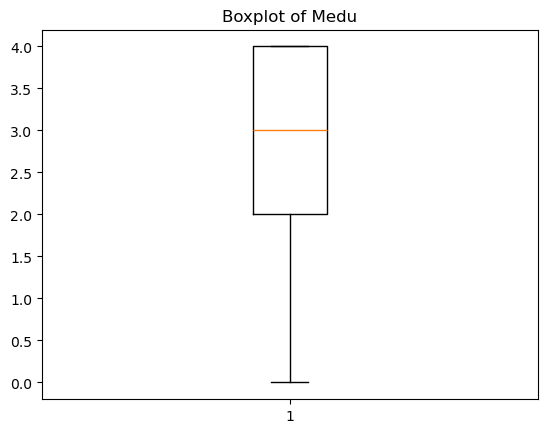

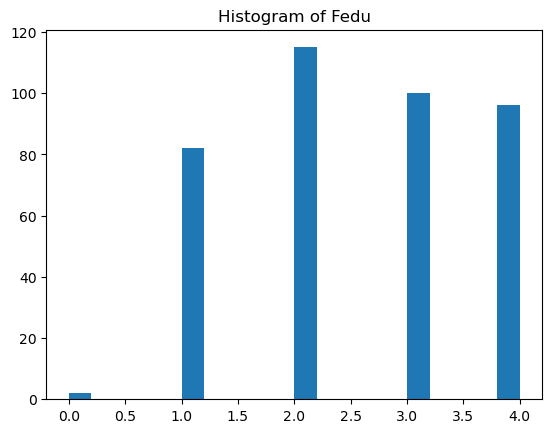

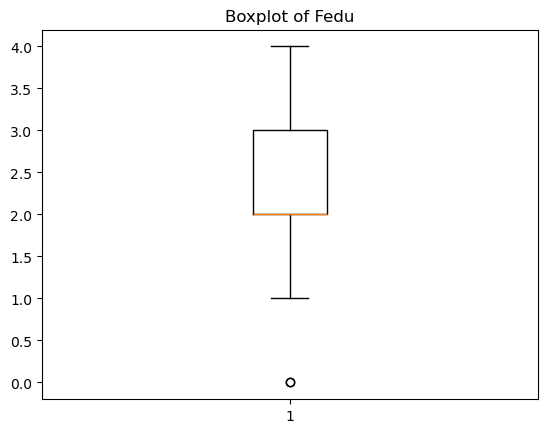

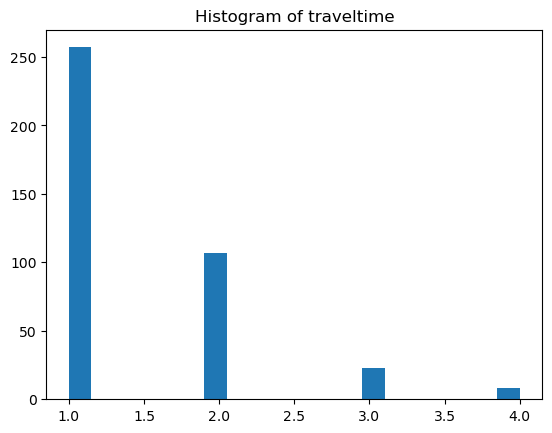

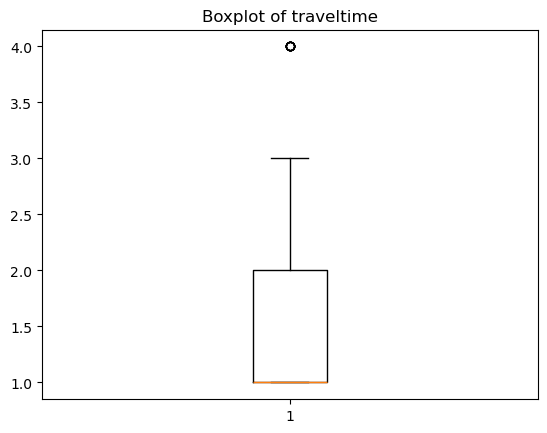

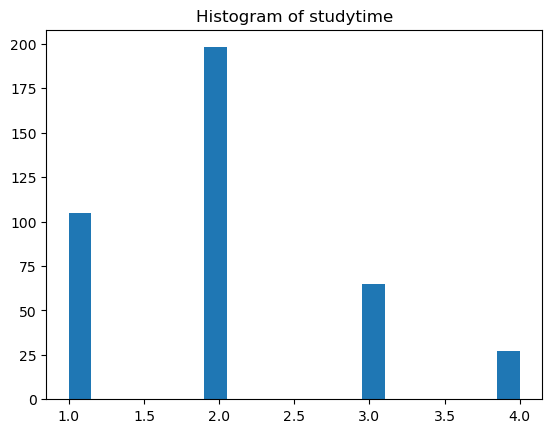

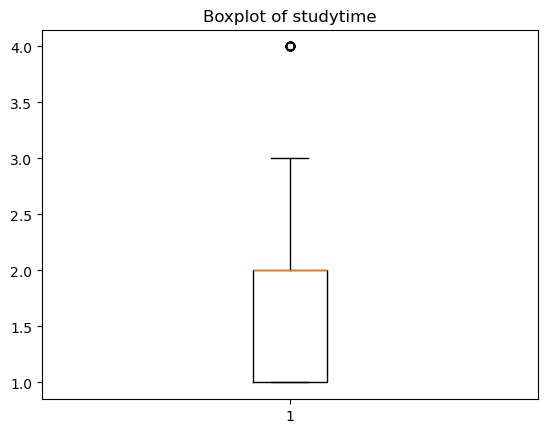

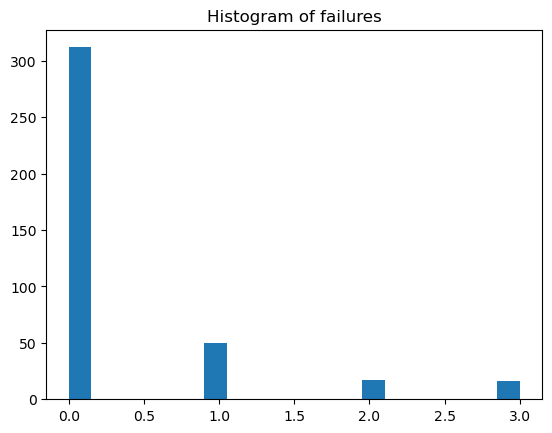

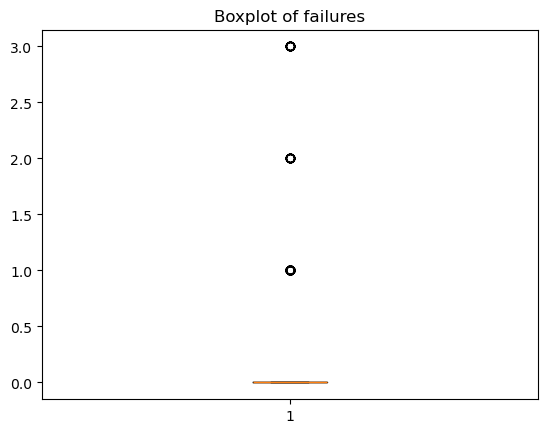

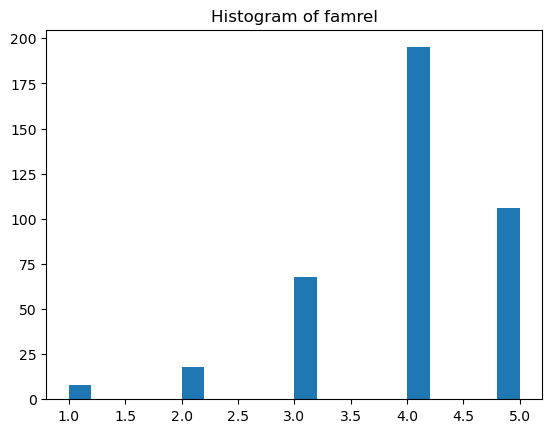

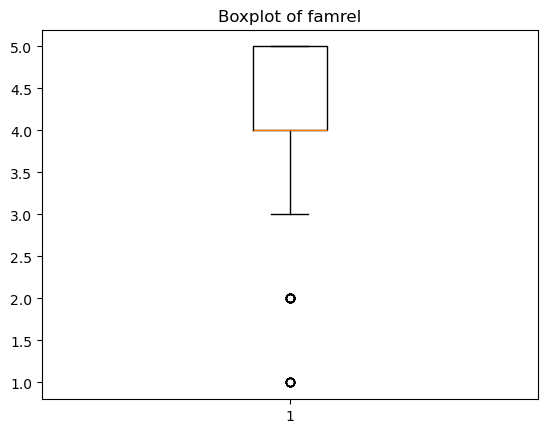

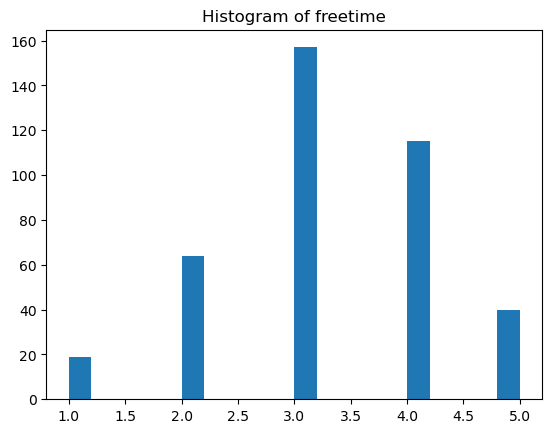

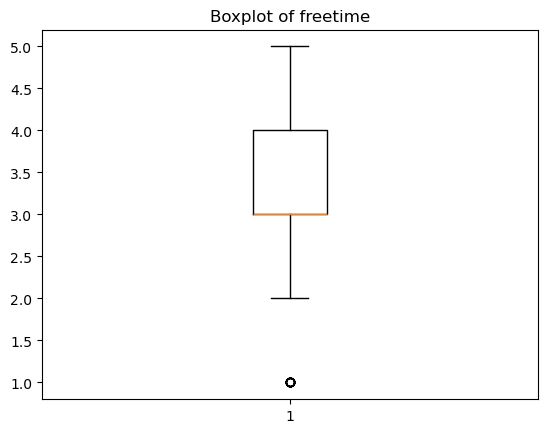

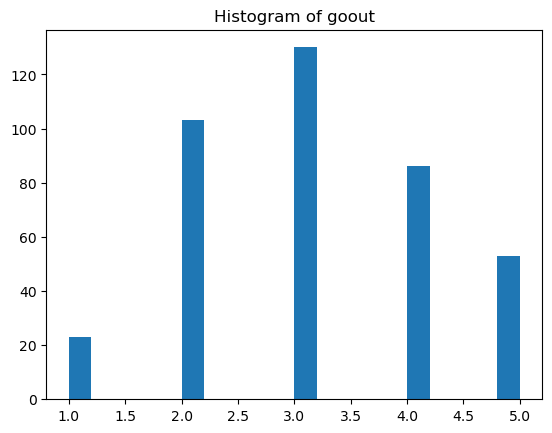

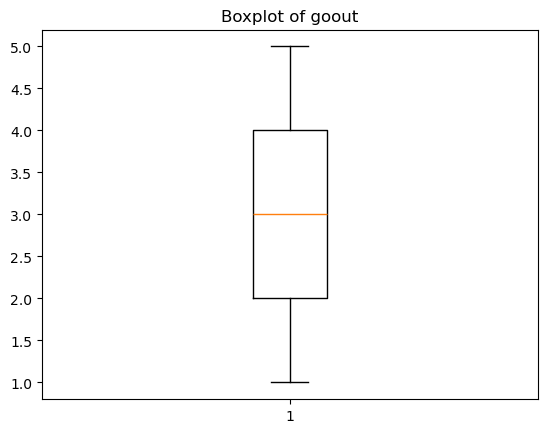

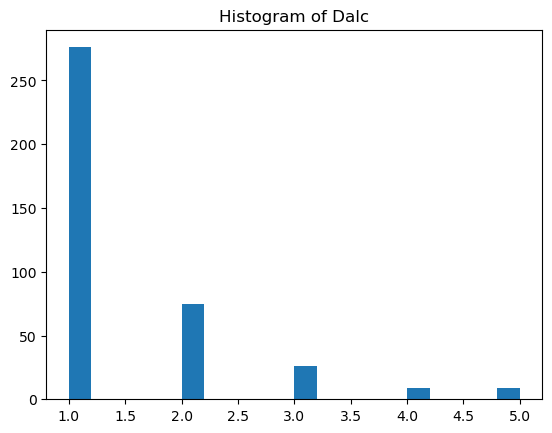

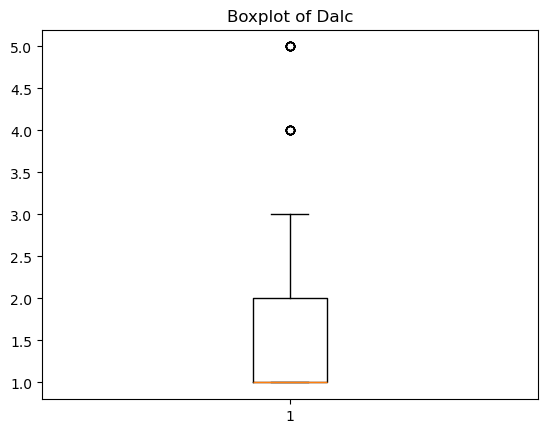

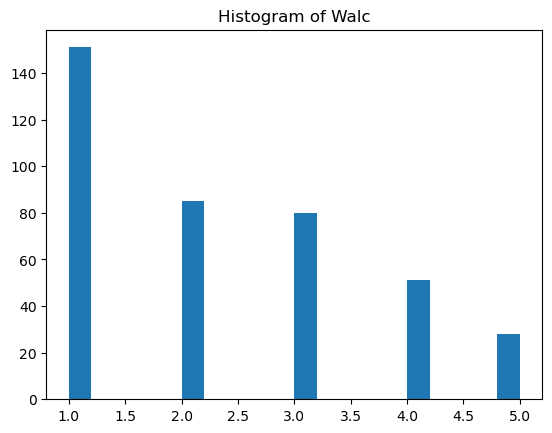

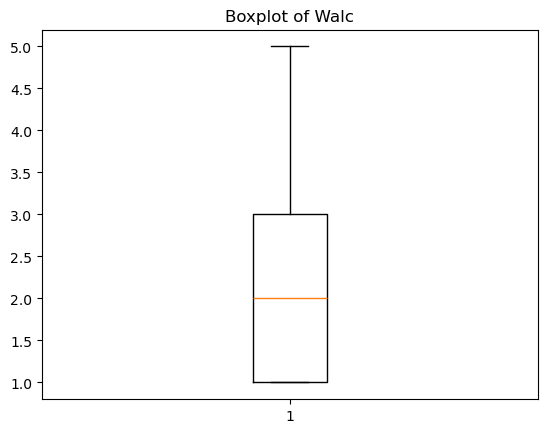

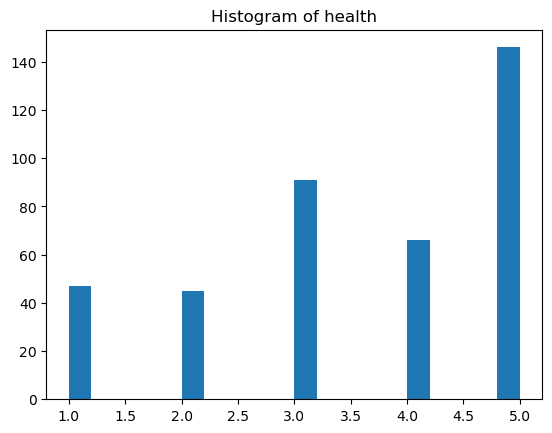

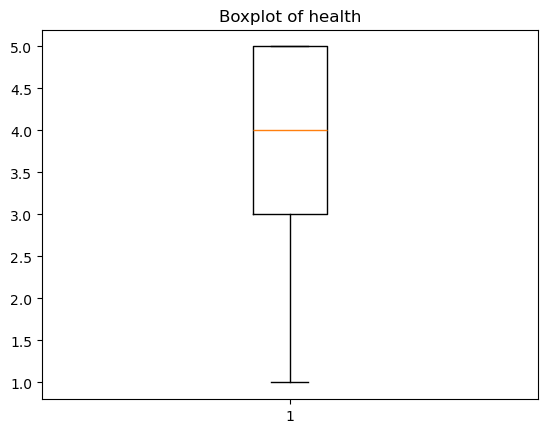

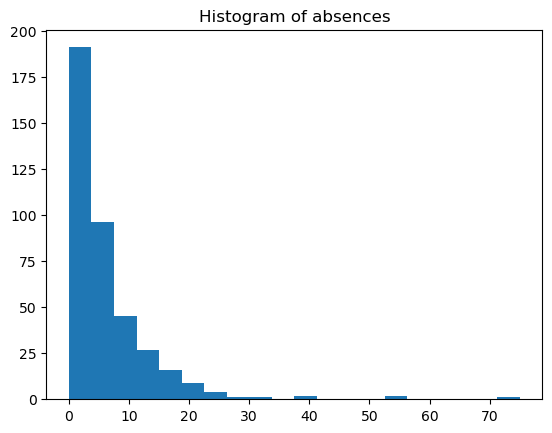

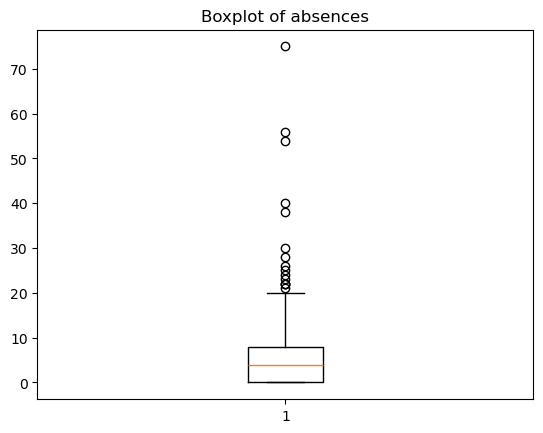

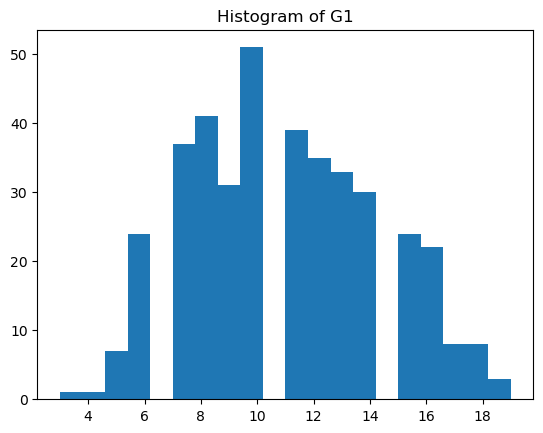

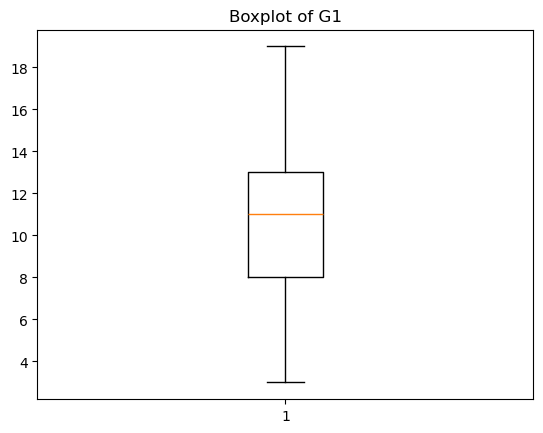

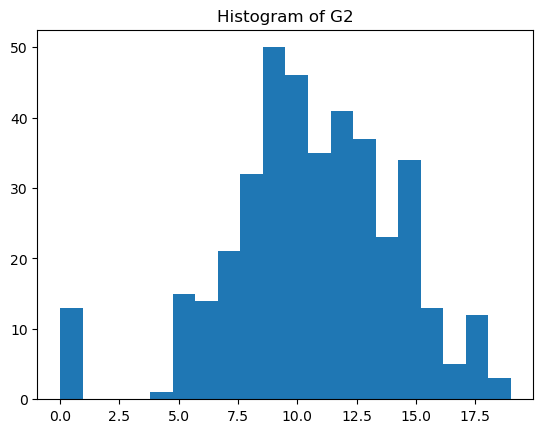

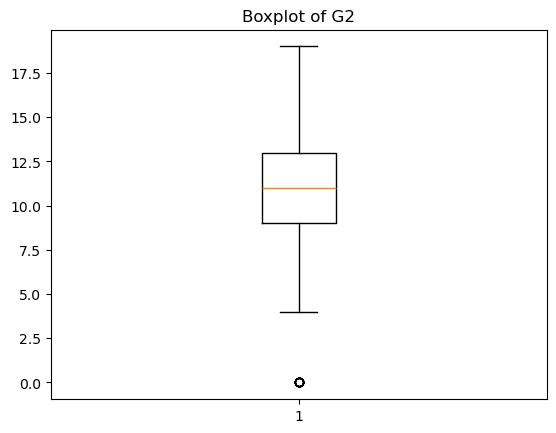

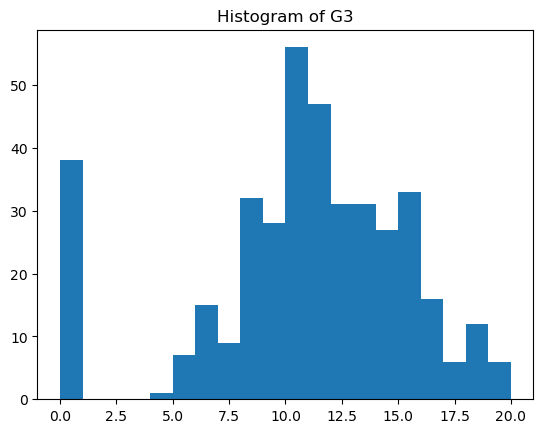

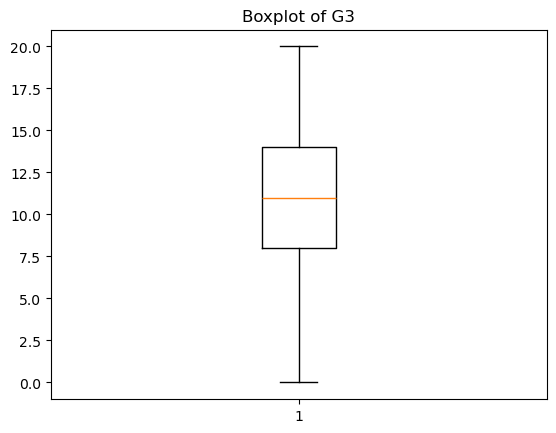

In [9]:
for col in numeric_cols:
    plt.figure()
    plt.hist(df[col], bins=20)
    plt.title(f"Histogram of {col}")
    plt.show()

    plt.figure()
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [10]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return lower, upper

df_outlier_flag = df.copy()

In [11]:
for col in numeric_cols:
    lower, upper = detect_outliers_iqr(df, col)
    df_outlier_flag[col + "_outlier"] = ((df[col] < lower) | (df[col] > upper))

# 6️⃣ Cap Outliers (Instead of Removing)
df_cleaned = df.copy()


In [12]:

for col in numeric_cols:
    lower, upper = detect_outliers_iqr(df, col)
    df_cleaned[col] = np.where(df[col] < lower, lower,
                               np.where(df[col] > upper, upper, df[col]))

print("\nOutliers handled using capping method.")


Outliers handled using capping method.



Correlation Matrix:
                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.165357 -0.164877    0.080078   0.012185       NaN   
Medu       -0.165357  1.000000  0.625981   -0.170070   0.068544       NaN   
Fedu       -0.164877  0.625981  1.000000   -0.156097   0.009151       NaN   
traveltime  0.080078 -0.170070 -0.156097    1.000000  -0.114884       NaN   
studytime   0.012185  0.068544  0.009151   -0.114884   1.000000       NaN   
failures         NaN       NaN       NaN         NaN        NaN       NaN   
famrel      0.050074  0.017352  0.009227   -0.011521   0.059369       NaN   
freetime    0.018784  0.027325 -0.017812   -0.023756  -0.141054       NaN   
goout       0.124521  0.064094  0.042034    0.017766  -0.065701       NaN   
Dalc        0.126195  0.019102  0.002729    0.115733  -0.219032       NaN   
Walc        0.113949 -0.047123 -0.015043    0.119278  -0.260464       NaN   
health     -0.058976 -0.046878  0.012193    0.002983  -

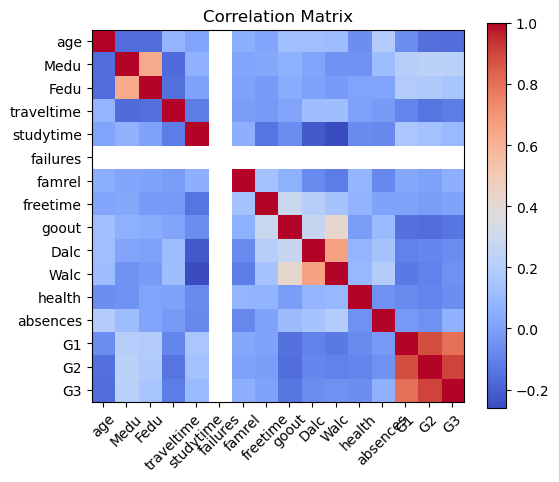

In [13]:
correlation = df_cleaned[numeric_cols].corr()

print("\nCorrelation Matrix:")
print(correlation)

plt.figure(figsize=(6,5))
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Matrix")
plt.show()